In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import copy
import gzip
import scipy.io
import h5py
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math

In [2]:
WN = np.loadtxt('W_avg.csv')
Cave = np.loadtxt('Cave.csv')
pop = np.loadtxt('pop_new.csv')

In [3]:
mat_data = scipy.io.loadmat('NewInf_0025.mat') #(3142, 60, 300)
mat_data2 = scipy.io.loadmat('NewInf_2.mat')
mat_data3 = scipy.io.loadmat('NewInf_01.mat')

mat_simulation = mat_data['NewInf']
mat_pop = mat_simulation/pop[:,None,None]*100000
mat_num_county = np.sum(mat_pop[:,:,:]>10,axis=0)
mean_county = np.mean(mat_num_county,axis=1)
std_county = np.std(mat_num_county,axis=1)

mat_simulation2 = mat_data2['NewInf']
mat_pop2 = mat_simulation2/pop[:,None,None]*100000
mat_num_county2 = np.sum(mat_pop2[:,:,:]>10,axis=0)
mean_county2 = np.mean(mat_num_county2,axis=1)
std_county2 = np.std(mat_num_county2,axis=1)

mat_simulation3 = mat_data3['NewInf']
mat_pop3 = mat_simulation3/pop[:,None,None]*100000
mat_num_county3 = np.sum(mat_pop3[:,:,:]>10,axis=0)
mean_county3 = np.mean(mat_num_county3,axis=1)
std_county3 = np.std(mat_num_county3,axis=1)

In [13]:
num_fips = len(pop)
T = 60
#initialize variables
# seeding
l0 = 1859-1 # start with New York County NY in python -1, in matlab is 1859

In [14]:
para_dict = np.load('para_dict.npy',allow_pickle=True)

In [15]:
R0s = np.arange(1.5, 6.5, 0.1)
rs = np.array([20, 10, 2.0, 1.0, 0.5, 0.2, 0.1, 0.05, 0.025])

In [16]:
import numpy as np
import gzip

def load_gzipped_numpy(filename):
    try:
        with gzip.open(filename, 'rb') as f:
            return np.load(f, allow_pickle=True)
    except FileNotFoundError:
        return [0]

In [17]:
R0 = 2.5
# rs = np.array([2.0, 0.025])
# rs = np.array([0.1])
export_dir = '/Users/qingyao/Documents/branching_data/simulation/python_cutoff_addno/'
E_mean_county = np.zeros((9,60))
E_std_county = np.zeros((9,60))
M_En_NewInf = np.zeros((9,300,num_fips,T))
for r_idx in range(9):
    r = rs[r_idx]
    print(r)
    sub_export_dir = export_dir+'branching_R0-{}_r-{}/'.format(np.round(R0,2),np.round(r,3))
    En_NewInf = np.zeros((300,num_fips,T))
    for i in range(300):
        export_names = sub_export_dir+'NewInf_R0-{}_r-{}_{}.npy.gz'.format(np.round(R0,2),np.round(r,3),(i+1))
        temp = load_gzipped_numpy(export_names)
        if len(temp) == 1:
            print(r, i)
        else:
            En_NewInf[i,:,:] = temp
            M_En_NewInf[r_idx,i,:,:] = temp
    ### select the ensembles in which the dieases does not die out
    E_daily_per_pop = En_NewInf[:,:,:]/pop[None,:,None]*100000
    num_county = np.sum(E_daily_per_pop[:,:,:]>10,axis=1)
    E_mean_county[r_idx] = np.mean(num_county,axis=0)
    E_std_county[r_idx] = np.std(num_county,axis=0)

20.0
10.0
2.0
1.0
0.5
0.2
0.1
0.05
0.025


In [19]:
### the average time when there are over 10 counties with 1 infector

In [10]:
NewInf_ode = np.loadtxt('metapop_R025.csv')
infec_perpop = NewInf_ode/pop[:,None]*100000
county_ode = np.sum(infec_perpop>10,axis=0)

In [1]:
### the stochastic version with poisson 

In [21]:
# with h5py.File('./M_stocha_poi.h5', 'r') as hf:
#     loaded_results = hf['data'][:]
# infec_perpop_en = loaded_results/pop[:,None]*100000
# num_counties_en = np.sum(infec_perpop_en>10,axis=1)
# county_ode_avg = np.mean(num_counties_en,axis=0)
# county_ode_std = np.std(num_counties_en,axis=0)
file_dir = '/Users/qingyao/Documents/branching_data/simulation/meta_stoch/dt0.1/'
loaded_results = np.zeros((300,3142,60))
sub_export_dir = file_dir+'meta_stoch_poi/'
for i in range(300):
    export_names = sub_export_dir+'New_Inf_poi_{}.csv'.format((i+1))
    temp = np.loadtxt(export_names,delimiter=',')
    if len(temp) == 1:
        print(r, i)
    else:
        loaded_results[i,:,:] = temp
pop_reshaped = pop.reshape(-1, 1)

# Perform the operation using broadcasting. This will automatically expand the dimensions where needed.
infec_perpop_en = (loaded_results / pop_reshaped) * 100000

# infec_perpop_en = loaded_results/pop[:,None]*100000
num_counties_en = np.sum(infec_perpop_en>10,axis=1)
county_ode_avg = np.mean(num_counties_en,axis=0)
county_ode_std = np.std(num_counties_en,axis=0)

In [19]:
colors = {0:'orange',3:'yellowgreen',6:'lightskyblue',8:'cornflowerblue'}

In [10]:
def rgb_to_cmyk(r, g, b):
    c = 1 - r / 255.
    m = 1 - g / 255.
    y = 1 - b / 255.
    
    min_cmy = min(c, m, y)
    
    if min_cmy == 1.0:
        return 0, 0, 0, 1
    
    c = (c - min_cmy) / (1 - min_cmy)
    m = (m - min_cmy) / (1 - min_cmy)
    y = (y - min_cmy) / (1 - min_cmy)
    k = min_cmy
    
    return c, m, y, k

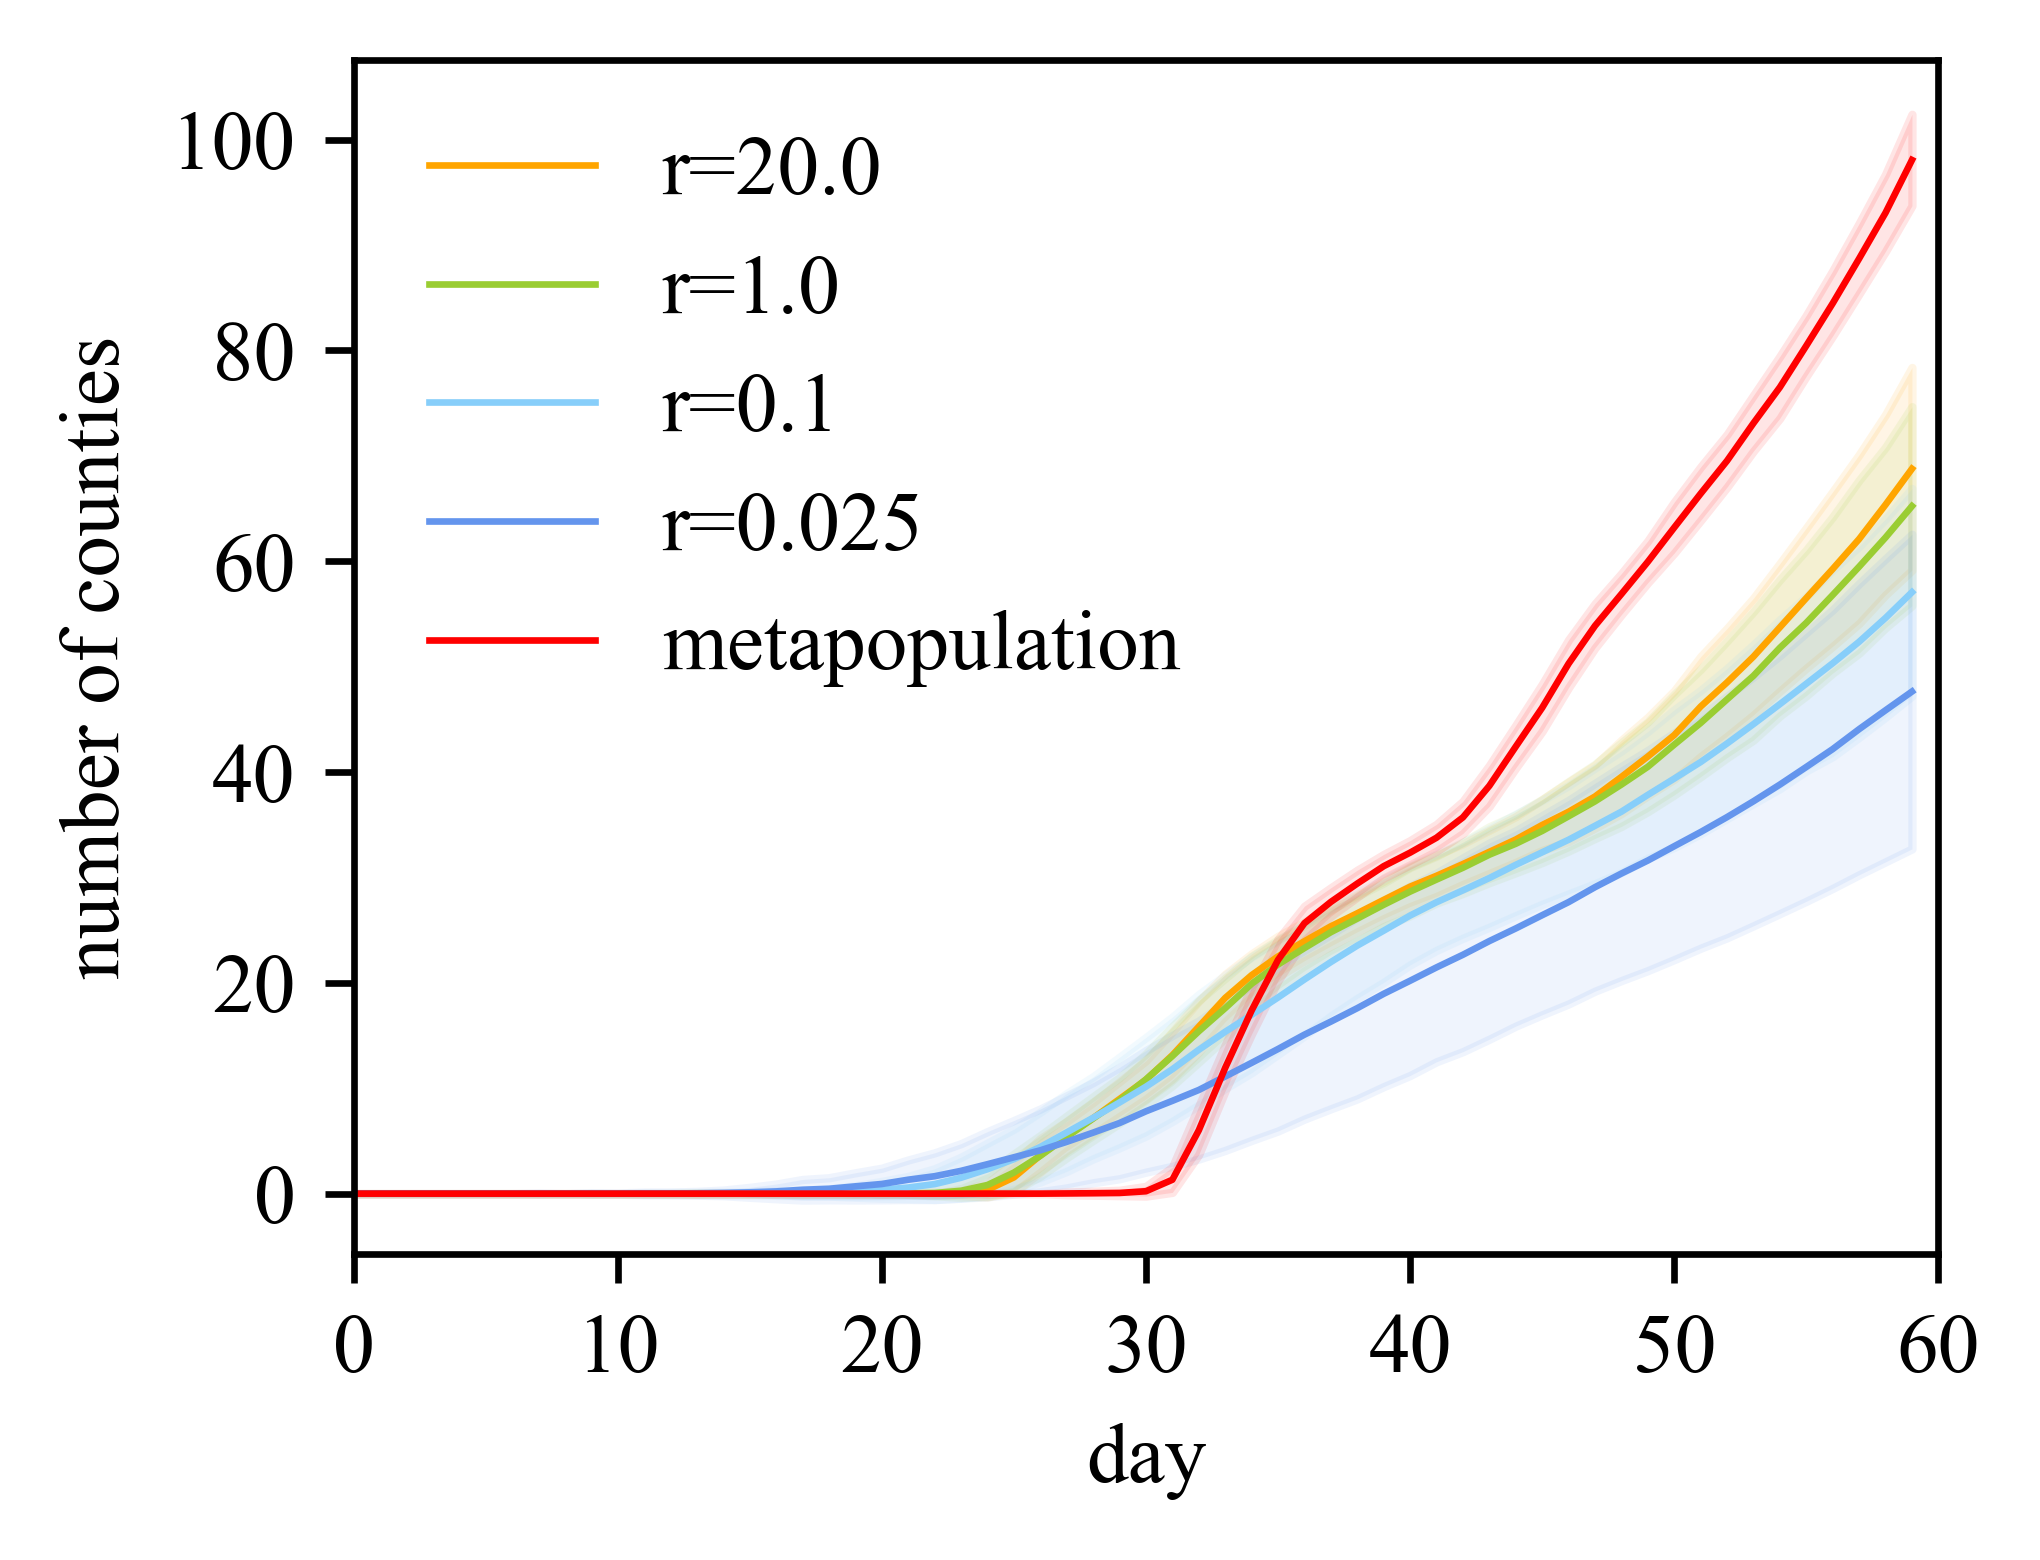

In [24]:
plt.rcParams['font.family'] = 'Times New Roman' 
plt.figure(dpi=600,figsize=(3.5,2.7))
for r_idx in [0,3,6,8]:
    r = rs[r_idx]
    mean_county1 =  E_mean_county[r_idx]
    std_county1 = E_std_county[r_idx]
    
    plt.fill_between(range(60),mean_county1-std_county1,mean_county1 +std_county1,alpha=0.1,color=colors[r_idx])
    plt.plot(mean_county1,label='r={}'.format(r),color=colors[r_idx],lw=0.8)


plt.plot(county_ode_avg,label='metapopulation',color='red',lw=0.8)
plt.fill_between(range(60),county_ode_avg-county_ode_std, county_ode_avg + county_ode_std, alpha=0.1,color='red')

# plt.plot(mean_county,label='r=0.025matlab')
# plt.fill_between(range(60),mean_county-std_county,mean_county +std_county,alpha=0.1)
# plt.plot(mean_county2,label='r=02matlab')
# plt.fill_between(range(60),mean_county2-std_county2,mean_county2 +std_county2,alpha=0.1)
# plt.plot(mean_county3,label='r=01matlab')
# plt.fill_between(range(60),mean_county3-std_county3,mean_county3 +std_county3,alpha=0.1)

plt.legend(frameon=False)
plt.xlabel('day',size=10)
plt.ylabel('number of counties',size=10)
plt.xlim(0,60)
plt.tight_layout()

# plt.ylim(-1,40)
plt.savefig('odevsbranching.pdf',bbox_inches='tight')
# plt.savefig('odevsbranching.eps',bbox_inches='tight',format='eps')